In [18]:
import json
import os
import matplotlib.pyplot as plt

In [19]:
os.listdir('/Users/katsukichan/Documents/Projects/Minecraft-Hack-Detection/Packets')

['EntityHeadLookPacket.py',
 'SpawnPlayerPacket.py',
 'EntityRelativeMovePacket.py',
 '__init__.py',
 'EntityStatusPacket.py',
 '__pycache__',
 'EntityVelocityPacket.py',
 'EntityTeleportPacket.py',
 'EntityMetadataPacket.py',
 'EntityLookAndRelativeMovePacket.py',
 'Packet.py',
 'EntityLookPacket.py',
 'EntityPacket.py']

In [20]:
ALL_PACKET_TYPES = ['entity_head_look','spawn_player', 'entity_relative_move', 'entity_status', 'entity_velocity', 'entity_teleport', 'entity_metadata', 'entity_look_and_relative_move', 'entity_look', 'entity', 'meta_0', 'meta_1', 'meta_2', 'meta_3', 'meta_6', 'meta_7']

In [21]:
packet_path = '../test.json'
with open(packet_path, 'r') as f:
    decoded_packets = json.load(f)

In [22]:
decoded_packets

[{'packet_type': 'spawn_player',
  'timestamp': 11785,
  'entity_id': 3506,
  'uuid': 'd2cd83e4e8e0416eadd4c3a02f49a950',
  'x': 8.5,
  'y': 65.0,
  'z': 8.5,
  'yaw': -0.5,
  'pitch': 0.0,
  'current_item': 0},
 {'packet_type': 'spawn_player',
  'timestamp': 11785,
  'entity_id': 3506,
  'uuid': 'd2cd83e4e8e0416eadd4c3a02f49a950',
  'x': 0.5,
  'y': 77.5,
  'z': 35.5,
  'yaw': 0.49609375,
  'pitch': 0.0,
  'current_item': 0},
 {'packet_type': 'entity_head_look',
  'timestamp': 11785,
  'entity_id': 3506,
  'head_yaw': 0.0},
 {'packet_type': 'entity_velocity',
  'timestamp': 11785,
  'entity_id': 3506,
  'velocity_x': 0.0,
  'velocity_y': 0.0,
  'velocity_z': 0.0},
 {'packet_type': 'meta_0', 'timestamp': 11785, 'entity_id': 3506, '0': [0]},
 {'packet_type': 'meta_0', 'timestamp': 11785, 'entity_id': 3506, '0': [0]},
 {'packet_type': 'meta_0', 'timestamp': 11785, 'entity_id': 3506, '0': [0]},
 {'packet_type': 'meta_3', 'timestamp': 11785, 'entity_id': 3506, '3': [0.0]},
 {'packet_type':

In [23]:
all_uuids = list(set([x['uuid'] for x in decoded_packets if 'uuid' in x]))

In [24]:
all_uuids

['d2cd83e4e8e0416eadd4c3a02f49a950',
 '7d03bcb0e56644e580adc7834733abbe',
 '9a097c62cc174967a38e1447d1e4dc17']

In [25]:
entity_3627 = [x for x in decoded_packets if ('entity_id' in x) and (x['entity_id'] == 3627)] #Naish02

In [26]:
entity_3628 = [x for x in decoded_packets if ('entity_id' in x) and (x['entity_id'] == 3628)] #Falopo360

In [27]:
entity_3506 = [x for x in decoded_packets if ('entity_id' in x) and (x['entity_id'] == 3506)] #Valedictoria

In [28]:
entity_3506_dict = {x: [] for x in ALL_PACKET_TYPES}
for packet in entity_3506:
    packet_type = packet['packet_type']
    entity_3506_dict[packet_type].append(packet)

In [71]:
entity_3506_dict['entity_look_and_relative_move']

[{'packet_type': 'entity_look_and_relative_move',
  'timestamp': 11785,
  'entity_id': 3506,
  'delta_x': 0.03125,
  'delta_y': -0.21875,
  'delta_z': -0.28125,
  'yaw': -0.42578125,
  'pitch': 0.0234375,
  'on_ground': False},
 {'packet_type': 'entity_look_and_relative_move',
  'timestamp': 11835,
  'entity_id': 3506,
  'delta_x': 0.03125,
  'delta_y': -0.3125,
  'delta_z': -0.28125,
  'yaw': -0.42578125,
  'pitch': 0.0234375,
  'on_ground': False},
 {'packet_type': 'entity_look_and_relative_move',
  'timestamp': 11886,
  'entity_id': 3506,
  'delta_x': 0.03125,
  'delta_y': -0.375,
  'delta_z': -0.28125,
  'yaw': -0.42578125,
  'pitch': 0.0234375,
  'on_ground': False},
 {'packet_type': 'entity_look_and_relative_move',
  'timestamp': 11934,
  'entity_id': 3506,
  'delta_x': 0.03125,
  'delta_y': -0.09375,
  'delta_z': -0.28125,
  'yaw': -0.42578125,
  'pitch': 0.0234375,
  'on_ground': True},
 {'packet_type': 'entity_look_and_relative_move',
  'timestamp': 11985,
  'entity_id': 3506,

In [60]:
def generate_data(packet_type, entity_dict):
    packet = entity_dict[packet_type]
    attrs = [x for x in packet[0].keys() if x not in ['timestamp', 'entity_id', 'packet_type']]
    timestamps = [x['timestamp'] for x in packet]
    attrs_dict = {}
    for attr in attrs:
        attr_values = [y[attr] for y in packet]
        attrs_dict[attr] = attr_values
    return timestamps, attrs_dict

In [68]:
def graph_data(timestamps, attrs_dict):
    for attr in attrs_dict.keys():
        plt.plot(timestamps, attrs_dict[attr], 'o')
    plt.show()

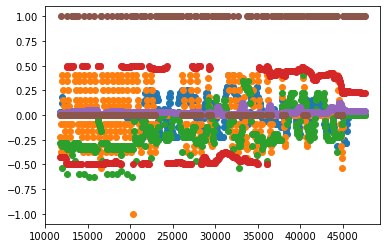

In [72]:
graph_data(*generate_data('entity_look_and_relative_move', entity_3506_dict))

In [37]:
timestamps_head_look_3506 = [x['timestamp'] for x in entity_3506_dict['entity_head_look']]
head_yaw_head_look_3506 = [x['head_yaw'] + 1 if x['head_yaw'] < 0 else x['head_yaw'] for x in entity_3506_dict['entity_head_look'] ]


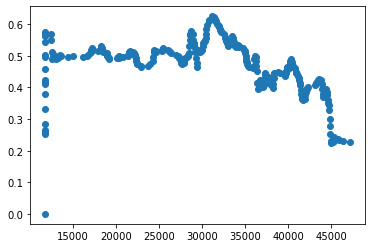

In [38]:
plt.plot(timestamps_head_look_3506, head_yaw_head_look_3506, 'o')